# LOAN DATA EXPLORATION
## Ashinze Emmanuel Chidi

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The link to the data set is as follows
  >https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv

## Preliminary Wrangling


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# import all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [71]:
#read the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/prosperLoanData.csv')

In [72]:
#view the first 5 rows
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [73]:
# check basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [74]:
#select features of interest
features = ['ListingKey','EmploymentStatus','EmploymentStatusDuration','Occupation',
           'ProsperScore','BorrowerRate','IncomeRange','Term',
            'StatedMonthlyIncome','LoanOriginalAmount','BorrowerState',
            'ListingCategory (numeric)','LoanStatus']
df = df[features]

In [75]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   EmploymentStatus           111682 non-null  object 
 2   EmploymentStatusDuration   106312 non-null  float64
 3   Occupation                 110349 non-null  object 
 4   ProsperScore               84853 non-null   float64
 5   BorrowerRate               113937 non-null  float64
 6   IncomeRange                113937 non-null  object 
 7   Term                       113937 non-null  int64  
 8   StatedMonthlyIncome        113937 non-null  float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  BorrowerState              108422 non-null  object 
 11  ListingCategory (numeric)  113937 non-null  int64  
 12  LoanStatus                 113937 non-null  object 
dtypes: float64(4), int64(3), obje

In [76]:
df.head()

,ListingKey,EmploymentStatus,EmploymentStatusDuration,Occupation,ProsperScore,BorrowerRate,IncomeRange,Term,StatedMonthlyIncome,LoanOriginalAmount,BorrowerState,ListingCategory (numeric),LoanStatus
0,1021339766868145413AB3B,Self-employed,2.0,Other,NaN,0.1580,"$25,000-49,999",36,3083.333333,9425,CO,0,Completed
1,10273602499503308B223C1,Employed,44.0,Professional,7.0,0.0920,"$50,000-74,999",36,6125.000000,10000,CO,2,Current
2,0EE9337825851032864889A,Not available,NaN,Other,NaN,0.2750,Not displayed,36,2083.333333,3001,GA,0,Completed
3,0EF5356002482715299901A,Employed,113.0,Skilled Labor,9.0,0.0974,"$25,000-49,999",36,2875.000000,10000,GA,16,Current
4,0F023589499656230C5E3E2,Employed,44.0,Executive,4.0,0.2085,"$100,000+",36,9583.333333,15000,MN,2,Current


In [77]:
df['ListingCategory (numeric)']

0          0
1          2
2          0
3         16
4          2
          ..
113932     1
113933     7
113934     1
113935     2
113936     1
Name: ListingCategory (numeric), Length: 113937, dtype: int64

In [78]:
#create a dictionary to make the listing category explanatory
re_dict = {0: 'Not Available', 1: 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business',
           4: 'Personal Loan',5:'Student Use',6: 'Auto', 7 : 'Other', 8:'Baby&Adoption', 9:'Boat', 
           10: 'Cosmetic Procedure', 11: 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 
           14 : 'Large Purchases', 15: 'Medical/Dental', 16 : 'Motorcycle', 17 :'RV', 18 : 'Taxes',
           19: 'Vacation', 20 :'Wedding Loans'}

re_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [79]:
for i in df['ListingCategory (numeric)']:
    df['ListingCategory (numeric)'].replace(to_replace=i, value = re_dict[i], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
#look at the listing category
df['ListingCategory (numeric)']

0              Not Available
1           Home Improvement
2              Not Available
3                 Motorcycle
4           Home Improvement
                 ...        
113932    Debt Consolidation
113933                 Other
113934    Debt Consolidation
113935      Home Improvement
113936    Debt Consolidation
Name: ListingCategory (numeric), Length: 113937, dtype: object

In [81]:
#check for duplicates
df.duplicated(subset=['ListingKey']).sum()

871

In [82]:
#drop duplicates
df.drop_duplicates(subset=['ListingKey'], inplace = True)
print(df.duplicated(subset=['ListingKey']).sum())

0


In [83]:
#check for null values
df.isna().sum()

ListingKey                       0
EmploymentStatus              2255
EmploymentStatusDuration      7625
Occupation                    3529
ProsperScore                 29084
BorrowerRate                     0
IncomeRange                      0
Term                             0
StatedMonthlyIncome              0
LoanOriginalAmount               0
BorrowerState                 5515
ListingCategory (numeric)        0
LoanStatus                       0
dtype: int64

In [84]:
#drop null values
df.dropna(
    axis = 0, 
    subset = [
        'EmploymentStatus', 
        'EmploymentStatusDuration', 
        'Occupation','ProsperScore','BorrowerState'
    ], 
    inplace = True
)

In [85]:
#round income to two decimal places
df.StatedMonthlyIncome = df.StatedMonthlyIncome.round(2)

In [86]:
#confirm changes
df.isna().sum()

ListingKey                   0
EmploymentStatus             0
EmploymentStatusDuration     0
Occupation                   0
ProsperScore                 0
BorrowerRate                 0
IncomeRange                  0
Term                         0
StatedMonthlyIncome          0
LoanOriginalAmount           0
BorrowerState                0
ListingCategory (numeric)    0
LoanStatus                   0
dtype: int64

In [87]:
#describe the dataset
df.describe(include = 'all')

,ListingKey,EmploymentStatus,EmploymentStatusDuration,Occupation,ProsperScore,BorrowerRate,IncomeRange,Term,StatedMonthlyIncome,LoanOriginalAmount,BorrowerState,ListingCategory (numeric),LoanStatus
count,82695,82695,82695.000000,82695,82695.000000,82695.000000,82695,82695.000000,8.269500e+04,82695.000000,82695,82695,82695
unique,82695,7,NaN,67,NaN,NaN,7,NaN,NaN,NaN,48,20,11
top,10273602499503308B223C1,Employed,NaN,Other,NaN,NaN,"$50,000-74,999",NaN,NaN,NaN,CA,Debt Consolidation,Current
freq,1,66585,NaN,21122,NaN,NaN,25002,NaN,NaN,NaN,10472,51424,54480
mean,NaN,NaN,103.389842,NaN,5.966866,0.196528,NaN,42.492001,5.964898e+03,9080.956757,NaN,NaN,NaN
std,NaN,NaN,96.215851,NaN,2.373374,0.074919,NaN,11.667640,8.324027e+03,6292.000411,NaN,NaN,NaN
min,NaN,NaN,0.000000,NaN,1.000000,0.040000,NaN,12.000000,0.000000e+00,1000.000000,NaN,NaN,NaN
25%,NaN,NaN,31.000000,NaN,4.000000,0.135900,NaN,36.000000,3.500000e+03,4000.000000,NaN,NaN,NaN
50%,NaN,NaN,75.000000,NaN,6.000000,0.189700,NaN,36.000000,5.000000e+03,7500.000000,NaN,NaN,NaN
75%,NaN,NaN,148.000000,NaN,8.000000,0.257600,NaN,60.000000,7.166670e+03,13500.000000,NaN,NaN,NaN


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82695 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 82695 non-null  object 
 1   EmploymentStatus           82695 non-null  object 
 2   EmploymentStatusDuration   82695 non-null  float64
 3   Occupation                 82695 non-null  object 
 4   ProsperScore               82695 non-null  float64
 5   BorrowerRate               82695 non-null  float64
 6   IncomeRange                82695 non-null  object 
 7   Term                       82695 non-null  int64  
 8   StatedMonthlyIncome        82695 non-null  float64
 9   LoanOriginalAmount         82695 non-null  int64  
 10  BorrowerState              82695 non-null  object 
 11  ListingCategory (numeric)  82695 non-null  object 
 12  LoanStatus                 82695 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usa

### What is the structure of your dataset?

> The dataset contains 113,937 loans with 81 features (including LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus and many others). A few variables of interest has been selected


| Column | Description |
| :--- | :--- |
| ListingKey | Unique key for each listing, same value as the 'key' used in the listing object in the API.|
|EmploymentStatusDuration |The length in months of the employment status at the time the listing was created.|
|Occupation|The Occupation selected by the Borrower at the time they created the listing.|
|ProsperScore|A custom risk score built using historical Prosper data. The score ranges from 1-11, with 11 being the best, or lowest risk score.  Applicable for loans originated after July 2009.|
| LoanOriginalAmount | The origination amount of the loan.|
| Term | The length of the loan expressed in months.|
| BorrowerRate | The borrower's interest rate for this loan.|
|BorrowerState|The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.|
| EmploymentStatus | The employment status of the borrower at the time they posted the listing.|
| IncomeRange | The income range of the borrower at the time the listing was created.|
| StatedMonthlyIncome | The monthly income the borrower stated at the time the listing was created.|
| LoanStatus | The current status of the loan:<br> [Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, *PastDue] <br> *(The PastDue status will be accompanied by a delinquency bucket)|
| ListingCategory | The category of the listing that the borrower selected when posting their listing:<br>[0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7 - Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans]|

### What is/are the main feature(s) of interest in your dataset?

> The Loan Status is the main feature of interest. I hope to observe other features that affect the status of the loan and how it can be effectively predicted

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

>  The loan status depends on the income and expenses of a person or company. Therefore EmploymentStatus, IncomeRange, EmploymentStatusDuration, Borrower Rate will help in predicting the status of the loan.

# UNIVARIATE EXPLORATION


<b> 1. Loan Status </b> :  <i> main variable of interest</i>

How many Loans are completed  or defaulted?

In [89]:
#create a copy of the dataset
df_status = df.copy()
df_status['LoanStatus'].value_counts()

Current                   54480
Completed                 19631
Chargedoff                 5334
Defaulted                  1005
Past Due (1-15 days)        793
Past Due (31-60 days)       356
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       264
FinalPaymentInProgress      201
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [90]:
#combine all past due loans into a single column
df_status.loc[df_status['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'
df_status[df_status['LoanStatus']=="Past Due"]

,ListingKey,EmploymentStatus,EmploymentStatusDuration,Occupation,ProsperScore,BorrowerRate,IncomeRange,Term,StatedMonthlyIncome,LoanOriginalAmount,BorrowerState,ListingCategory (numeric),LoanStatus
12,0F1A3597143888805163EF7,Employed,1.0,Sales - Retail,4.0,0.1435,"$25,000-49,999",36,2416.67,4000,AL,Debt Consolidation,Past Due
82,10623584773904550935540,Employed,47.0,Other,2.0,0.2932,"$50,000-74,999",36,4166.67,4000,NY,Other,Past Due
139,112A35420359988673C6984,Other,111.0,Other,3.0,0.2999,"$1-24,999",36,1835.42,2500,KY,Home Improvement,Past Due
508,08D335216318965380C136A,Employed,48.0,Nurse's Aide,6.0,0.2699,"$25,000-49,999",36,2099.00,4500,MO,Debt Consolidation,Past Due
597,094C3551700144680B7B88F,Employed,53.0,Retail Management,8.0,0.1551,"$50,000-74,999",60,5533.33,23500,TX,Debt Consolidation,Past Due
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113697,C46B3530983760459B258B6,Employed,146.0,Professional,5.0,0.2487,"$75,000-99,999",36,7583.33,4000,MD,Household Expenses,Past Due
113700,C47435601077859648BA1A6,Employed,14.0,Executive,5.0,0.2346,"$100,000+",36,14000.00,12500,DE,Debt Consolidation,Past Due
113748,C4D7358104519561400DC94,Other,77.0,Other,2.0,0.2786,"$50,000-74,999",36,5445.00,4000,NY,Home Improvement,Past Due
113769,DE4C35848475602944EFA18,Employed,169.0,Analyst,3.0,0.2786,"$75,000-99,999",36,6333.33,2600,NJ,Debt Consolidation,Past Due


In [91]:
#check for the counts of each category
df_status['LoanStatus'].value_counts()

Current                   54480
Completed                 19631
Chargedoff                 5334
Past Due                   2044
Defaulted                  1005
FinalPaymentInProgress      201
Name: LoanStatus, dtype: int64

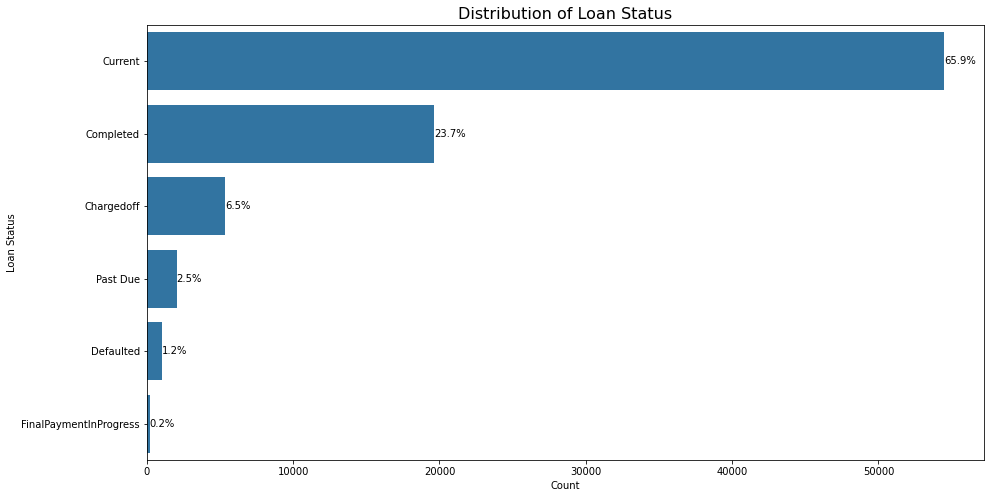

In [92]:
#creating the  barchart
loan_status_counts = df_status.LoanStatus.value_counts()

# get the unique values in the decreasing order of the frequency
loan_status_order = loan_status_counts.index

# return the sum of all not-null values
n_loan = loan_status_counts.sum()

plt.figure(figsize = (15,8))
plt.rc('axes', titlesize=16) 
sb.countplot(
    data = df_status, 
    y = 'LoanStatus', 
    order = loan_status_order,
    color = sb.color_palette()[0]
)
plt.title('Distribution of Loan Status')

plt.ylabel('Loan Status')
plt.xlabel('Count')

for i in range (loan_status_counts.shape[0]):
    count = loan_status_counts[i]
    # convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100 * count / n_loan) + '%'
    # print the string value on the bar
    plt.text(count + 1, i, pct_string, va = 'center')

Majority of the loans are either current,completed or charged off.

Although there are a number of defaulted or past due loans, on the general view, people pay up their loans.

66.2% of the loans are currrent, 23.5% completed , 6.4% charged off, 2.5% past due loans and 1.2% loans defaulted.

A total of 3058 loans were not paid out of a total of 83507.


<b>2. Employment Status</b>

Are borrowers actively employed?

In [93]:
#check the count of each category
df_status['EmploymentStatus'].value_counts()

Employed         66585
Full-time         7915
Self-employed     4454
Other             2469
Not employed       649
Retired            367
Part-time          256
Name: EmploymentStatus, dtype: int64

In [94]:
#aggregate the similarcategories
df_status['EmploymentStatus'].replace(
    {
        'Full-time': 'Employed', 
        'Self-employed': 'Employed', 
        'Part-time': 'Employed',
        'Not available': 'Other'
    },  
    inplace = True
)

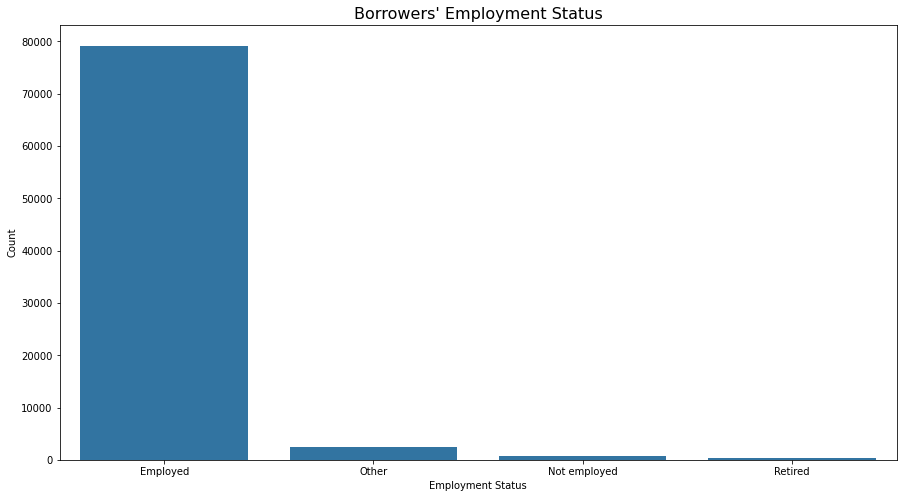

In [95]:
#plot the bar chart
plt.figure(figsize = (15,8))
sb.countplot(
    data = df_status, 
    x = 'EmploymentStatus',
    order = df_status.EmploymentStatus.value_counts().index,
    color = sb.color_palette()[0]
)
plt.title("Borrowers' Employment Status")
plt.ylabel('Count')
plt.xlabel('Employment Status');



Nearly all borrowers are employed and very few unemployed. This is expected as the ability to pay for a loan depends on a source of income, without being employed, it will be difficult to pay the loans. Although there are retirees depending on pensions that also take loans and other that are not actively employed but have rich relatives that can help with the loans.  

<b>3. Employment Status Duration</b>

How many years of work do Borrowers have?

In [96]:
#chech the column of interest
df_status['EmploymentStatusDuration']

1          44.0
3         113.0
4          44.0
5          82.0
6         172.0
          ...  
113932    246.0
113933     21.0
113934     84.0
113935     94.0
113936    244.0
Name: EmploymentStatusDuration, Length: 82695, dtype: float64

Text(0.5, 1.0, 'Distribution of Employment Status Duration')

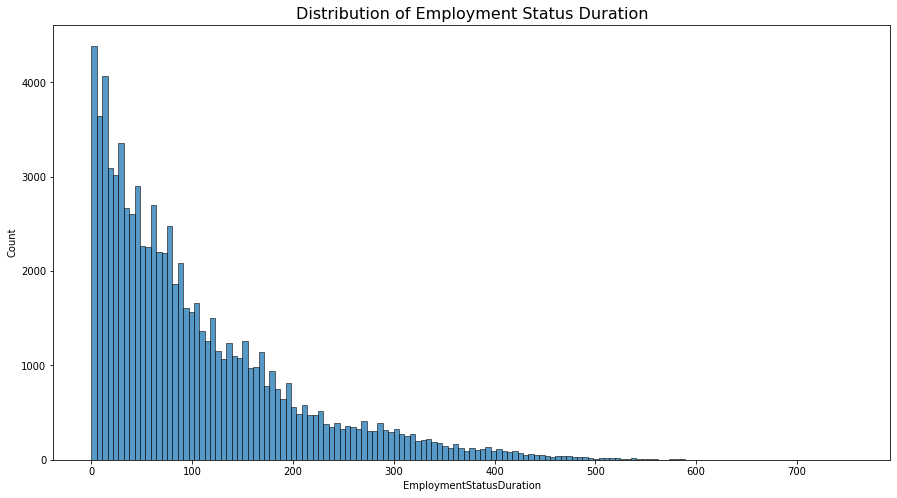

In [97]:
#plot the histogram 
plt.figure(figsize = (15,8))
sb.histplot(x='EmploymentStatusDuration',data = df_status)

plt.title('Distribution of Employment Status Duration')

In [98]:
#check info of the  feature
df['EmploymentStatusDuration'].describe()

count    82695.000000
mean       103.389842
std         96.215851
min          0.000000
25%         31.000000
50%         75.000000
75%        148.000000
max        755.000000
Name: EmploymentStatusDuration, dtype: float64

Text(0.5, 1.0, 'Distribution of Employment Status Duration')

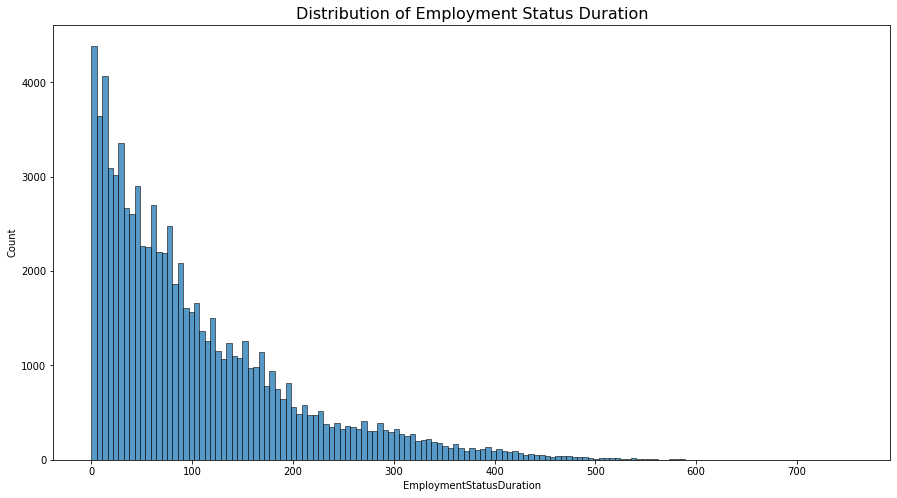

In [99]:
#plot the histogram 
plt.figure(figsize = (15,8))
sb.histplot(x='EmploymentStatusDuration',data = df_status)
plt.title('Distribution of Employment Status Duration')

Text(0.5, 1.0, 'Distribution of Employment Status Duration')

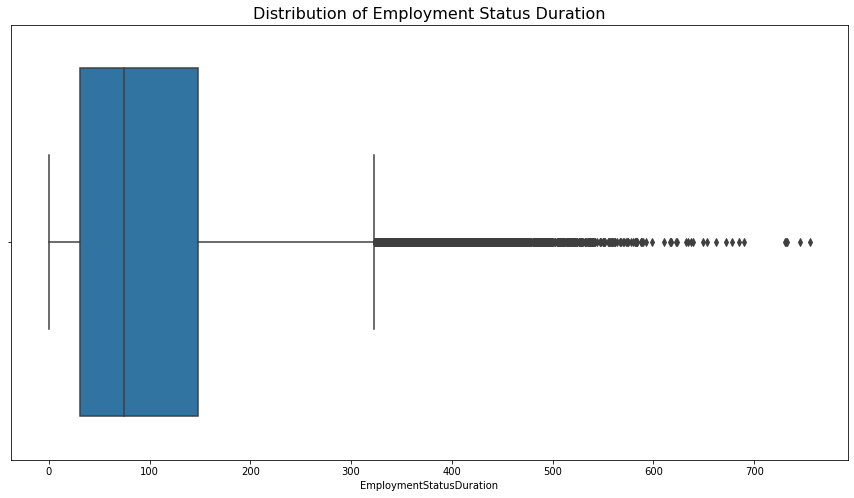

In [100]:
#plot the boxplot
plt.figure(figsize = (15,8))
sb.boxplot(x='EmploymentStatusDuration',data = df_status)
plt.title('Distribution of Employment Status Duration')

 The distribution of employment status duration is skewed to the right with the prescence of many high outliers. This means people at the early stages of their career take more loans as copare o people with years of work.
 This can be associated to the increment in salary with time. Although there are people with many years of work that takes loans, over 50% of the borrowers have less than 6 years work duration.

<b>4. Occupation</b>

What Occupation Borrows the most?

In [101]:
#check the count of each category
df_status['Occupation'].value_counts()

Other                          21122
Professional                   10442
Executive                       3437
Computer Programmer             3200
Teacher                         2858
                               ...  
Judge                             22
Student - College Freshman        17
Student - College Sophomore       16
Student - Community College       10
Student - Technical School         2
Name: Occupation, Length: 67, dtype: int64

In [102]:
#check for the unique value counts
df_status['Occupation'].nunique()

67

In [103]:
#chek for the duplicates
df_status['Occupation'].value_counts().index

Index(['Other', 'Professional', 'Executive', 'Computer Programmer', 'Teacher',
       'Analyst', 'Administrative Assistant', 'Accountant/CPA',
       'Sales - Commission', 'Skilled Labor', 'Nurse (RN)', 'Clerical',
       'Sales - Retail', 'Retail Management', 'Truck Driver', 'Construction',
       'Police Officer/Correction Officer', 'Laborer', 'Civil Service',
       'Engineer - Mechanical', 'Food Service Management',
       'Engineer - Electrical', 'Medical Technician', 'Attorney',
       'Food Service', 'Military Enlisted', 'Tradesman - Mechanic',
       'Social Worker', 'Postal Service', 'Professor', 'Nurse (LPN)', 'Doctor',
       'Tradesman - Electrician', 'Nurse's Aide', 'Fireman', 'Waiter/Waitress',
       'Scientist', 'Principal', 'Bus Driver', 'Military Officer', 'Realtor',
       'Pharmacist', 'Investor', 'Teacher's Aide', 'Engineer - Chemical',
       'Landscaping', 'Clergy', 'Pilot - Private/Commercial', 'Architect',
       'Car Dealer', 'Psychologist', 'Student - College

In [104]:
#aggreggate repeating entries
df_status.loc[df_status['Occupation'].str.contains('Student'), 'Occupation'] = 'Student'
df_status[df_status['Occupation']=="Student"]

df_status.loc[df_status['Occupation'].str.contains('Sales'), 'Occupation'] = 'Sales'
df_status[df_status['Occupation']=="Sales"]

df_status.loc[df_status['Occupation'].str.contains('Engineer'), 'Occupation'] = 'Engineer'
df_status[df_status['Occupation']=="Engineer"]

df_status.loc[df_status['Occupation'].str.contains('Tradesman'), 'Occupation'] = 'Tradesman'
df_status[df_status['Occupation']=="Tradesman"]

df_status.loc[df_status['Occupation'].str.contains('Nurse'), 'Occupation'] = 'Nurse'
df_status[df_status['Occupation']=="Nurse"]


,ListingKey,EmploymentStatus,EmploymentStatusDuration,Occupation,ProsperScore,BorrowerRate,IncomeRange,Term,StatedMonthlyIncome,LoanOriginalAmount,BorrowerState,ListingCategory (numeric),LoanStatus
50,0FA035965589061761C3D7A,Employed,43.0,Nurse,5.0,0.2150,"$75,000-99,999",60,7916.67,10000,TX,Debt Consolidation,Current
51,0FA935298156996977CF764,Employed,0.0,Nurse,8.0,0.1799,"$50,000-74,999",36,4853.33,2500,AR,Debt Consolidation,Current
86,1079360150757893206802F,Employed,131.0,Nurse,4.0,0.1905,"$50,000-74,999",36,5416.67,4500,FL,Debt Consolidation,Current
110,10C53499552694250BE1012,Employed,24.0,Nurse,5.0,0.3100,"$50,000-74,999",36,4666.67,3000,PA,Other,Completed
195,10AE357827721554660AC5B,Employed,54.0,Nurse,5.0,0.1769,"$75,000-99,999",60,6666.67,15000,TX,Debt Consolidation,Current
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113657,C45A35794472075071B6409,Employed,119.0,Nurse,8.0,0.0924,"$50,000-74,999",36,6083.33,20000,MD,Debt Consolidation,Current
113667,DBF33525349390624E9CFD4,Employed,74.0,Nurse,4.0,0.3199,"$75,000-99,999",36,6250.00,7500,WA,Debt Consolidation,Chargedoff
113796,E457360161315253186457B,Employed,128.0,Nurse,10.0,0.0930,"$100,000+",36,12500.00,25000,CA,Debt Consolidation,Current
113811,C6E73592981087840368F42,Employed,16.0,Nurse,6.0,0.2015,"$50,000-74,999",60,4608.00,15000,NC,Other,Current


In [105]:
#confirm changes
df_status['Occupation'].nunique()

53

Text(0.5, 1.0, 'Top 10 Borrowers by Occupation')

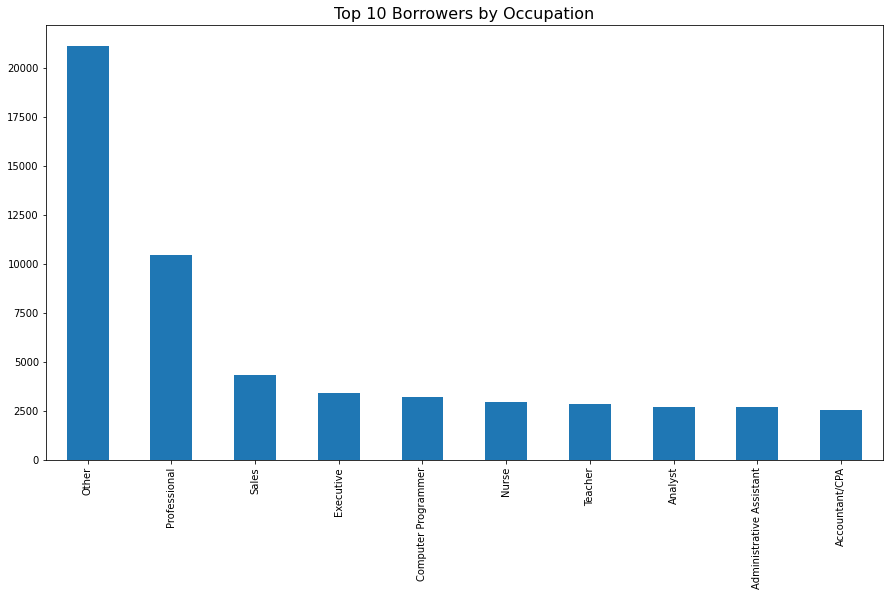

In [106]:
#plot the bar graph
plt.figure(figsize = (15,8))
df_status['Occupation'].value_counts().sort_values(ascending=False)[0:10].plot(kind ='bar')
plt.title('Top 10 Borrowers by Occupation')

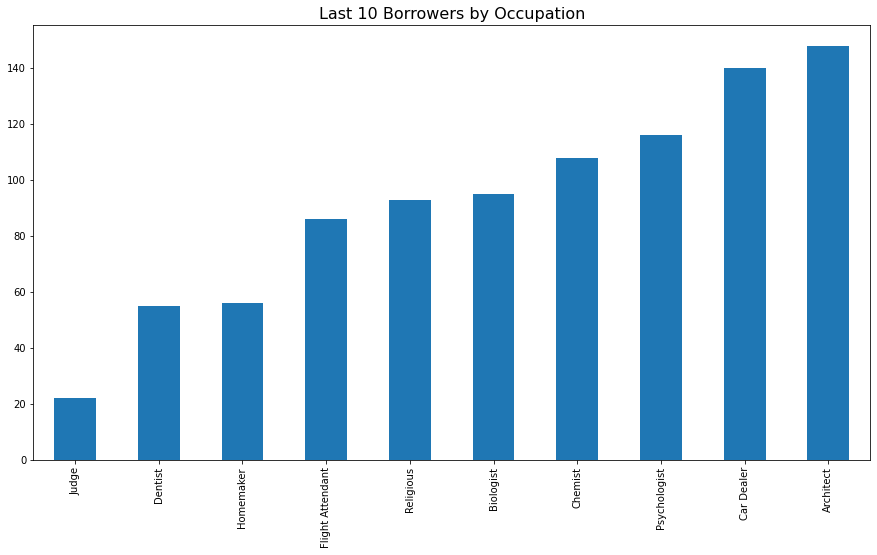

In [107]:
#plot the bar graph
plt.figure(figsize = (15,8))
plt.title('Last 10 Borrowers by Occupation')
df_status['Occupation'].value_counts().sort_values(ascending=True)[0:10].plot(kind ='bar')

It can be deduced from the graphs that Professionals, Salesmen ,Executives and programmers borrow more than the other professions. Judges and dentists have the lowest number of borrowers, this can be associated to the fact that they are high income earners.

<b>5. Prosper Score</b>

How is borrowing risk distributed?

In [108]:
#check for the unique values
df_status['ProsperScore'].unique()

array([ 7.,  9.,  4., 10.,  2.,  8.,  5.,  3.,  6., 11.,  1.])

Text(0.5, 1.0, 'Distribution of Prosper score')

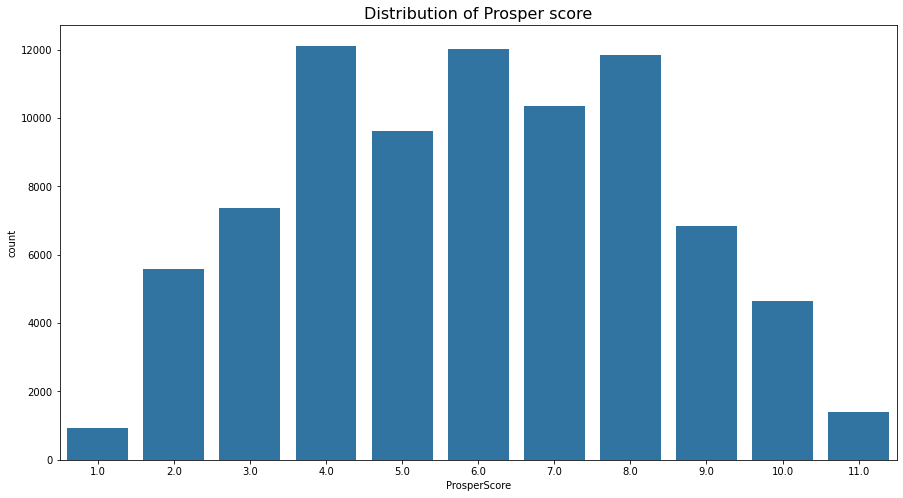

In [109]:
#plot the barplot
plt.figure(figsize = (15,8))
sb.countplot(data= df_status, x='ProsperScore',color =sb.color_palette()[0] )
plt.title('Distribution of Prosper score')

The Prosper score is Normally distributed, centered around 6.0. A few of the borrowes have 10.0 and above and a few have below 3.0. This is expected as loans will not given to an unsuccessful individual and highly successful individuals might not need loans  

<b>6. BorrowerRate</b>

Does interest rate affects loans?

In [110]:
#check the features 
df_status['BorrowerRate']

1         0.0920
3         0.0974
4         0.2085
5         0.1314
6         0.2712
           ...  
113932    0.1864
113933    0.1110
113934    0.2150
113935    0.2605
113936    0.1039
Name: BorrowerRate, Length: 82695, dtype: float64

How does borrower rate affect loans?

Text(0.5, 1.0, 'Distribution of BorrowerRate')

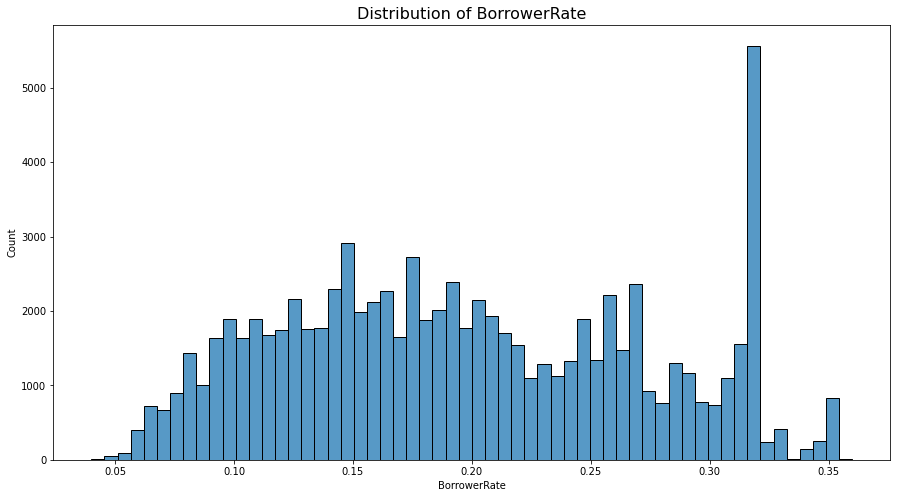

In [111]:
# plot the barplot

plt.figure(figsize = (15,8))
sb.histplot(x='BorrowerRate',data = df_status)

plt.title('Distribution of BorrowerRate')

The Borrower Rate seems to be normally distributed with a huge spike at 0.32. It seems that a lot of the loans have a rate of 0.32 

<b>7. IncomeRange</b>

What set of earners borrow the most?


In [112]:
#check the feature 
df_status.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82695 entries, 1 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ListingKey                 82695 non-null  object 
 1   EmploymentStatus           82695 non-null  object 
 2   EmploymentStatusDuration   82695 non-null  float64
 3   Occupation                 82695 non-null  object 
 4   ProsperScore               82695 non-null  float64
 5   BorrowerRate               82695 non-null  float64
 6   IncomeRange                82695 non-null  object 
 7   Term                       82695 non-null  int64  
 8   StatedMonthlyIncome        82695 non-null  float64
 9   LoanOriginalAmount         82695 non-null  int64  
 10  BorrowerState              82695 non-null  object 
 11  ListingCategory (numeric)  82695 non-null  object 
 12  LoanStatus                 82695 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usa

In [113]:
#check the category
df_status['IncomeRange'].value_counts()

$50,000-74,999    25002
$25,000-49,999    23344
$100,000+         15016
$75,000-99,999    14270
$1-24,999          4369
Not employed        649
$0                   45
Name: IncomeRange, dtype: int64

In [114]:
#create a countplot function
def count_plot(x_,l):
    
    plt.figure(figsize = [15, 8]) 
    sb.countplot(data = x_, y =l,color = sb.color_palette()[0]);

    plt.title(l+' Distribution')

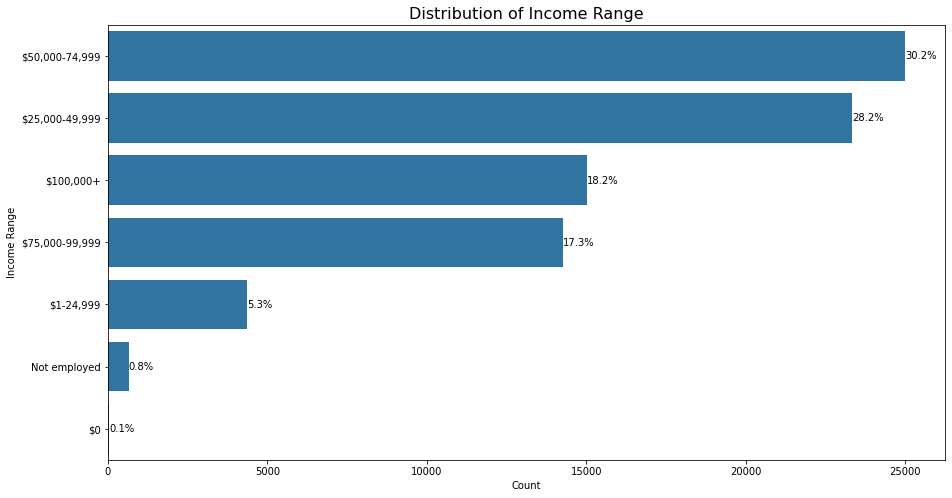

In [115]:
#creating the  barchart
income = df_status.IncomeRange.value_counts()

# get the unique values in the decreasing order of the frequency
iorder = income.index

# return the sum of all not-null values
n_inc = income.sum()

plt.figure(figsize = (15,8))
plt.rc('axes', titlesize=16) 
sb.countplot(
    data = df_status, 
    y = 'IncomeRange', 
    order = iorder,
    color = sb.color_palette()[0]
)
plt.title('Distribution of Income Range')

plt.ylabel('Income Range')
plt.xlabel('Count')

for i in range (income.shape[0]):
    count = income[i]
    # convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100 * count / n_inc) + '%'
    # print the string value on the bar
    plt.text(count + 1, i, pct_string, va = 'center')

30%  of the borrowers earn from 50,000 - 74,999 and only a few unemployed borrowers.

<b>8. Term</b>

What is the most preferreed duration for loans?

In [116]:
#check for the category
df['Term'].value_counts()

36    57100
60    23982
12     1613
Name: Term, dtype: int64

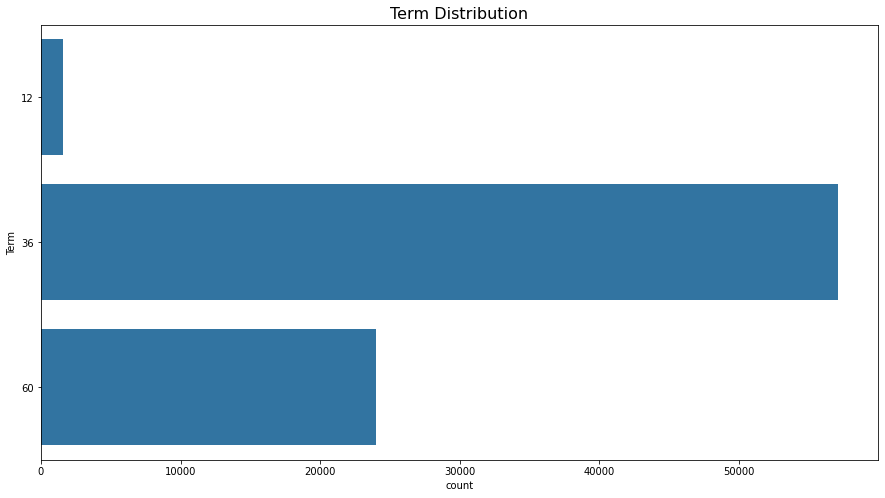

In [117]:
#plot the bar graph
count_plot(x_ = df_status, l= 'Term',)

Text(0.5, 1.0, 'Proportion of Term (Months)')

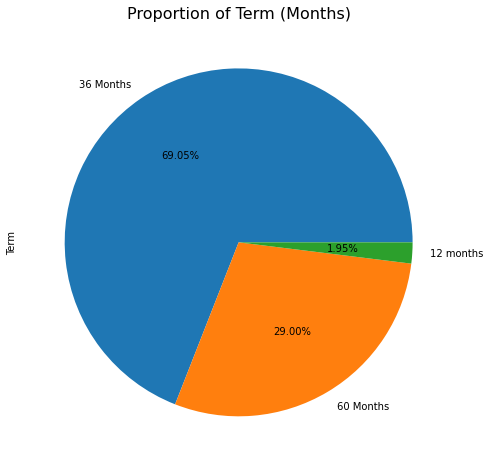

In [118]:
#plot the pie chart
plt.figure(figsize = (15,8))
df['Term'].value_counts().plot(kind='pie',autopct = '%.2f%%',labels =['36 Months','60 Months','12 months'])

plt.title('Proportion of Term (Months)')


Most of the loans are 36 months in duration with just few 12 months loan.

<b>9. ListingCategory (numeric)</b>

What are the loans used for?

In [119]:
#check for the category
df_status['ListingCategory (numeric)'].value_counts()

Debt Consolidation    51424
Other                  9085
Home Improvement       6716
Business               5259
Auto                   2223
Household Expenses     1967
Medical/Dental         1486
Taxes                   877
Large Purchases         852
Wedding Loans           759
Vacation                755
Motorcycle              304
Student Use             274
Engagement Ring         214
Baby&Adoption           196
Cosmetic Procedure       91
Boat                     85
Green Loans              57
RV                       51
Not Available            20
Name: ListingCategory (numeric), dtype: int64

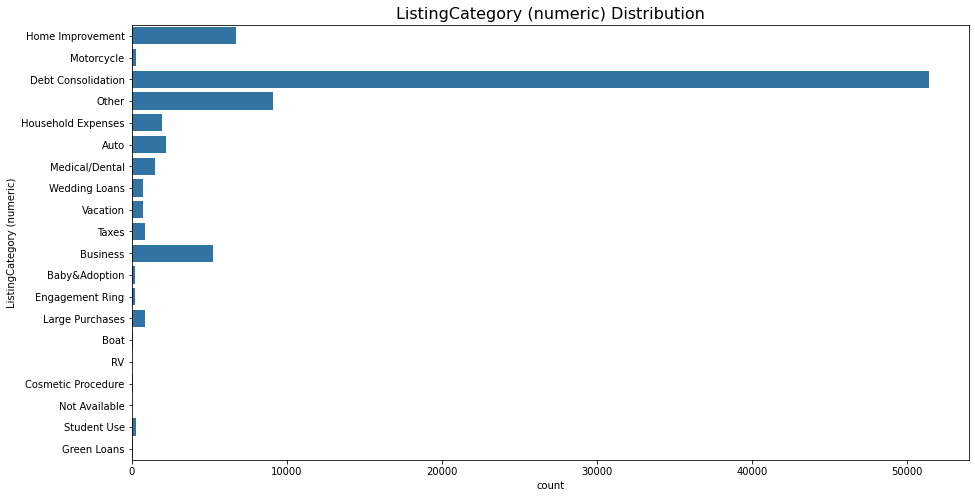

In [120]:
#plot the countplot
count_plot(x_ = df_status, l= 'ListingCategory (numeric)',)

Most of the loans are used for Debt Consolidation and Health Improvement.

<b>10. BorrowerState</b>

Does geographical location affect loans?

In [121]:
#check the category
df['BorrowerState']

1         CO
3         GA
4         MN
5         NM
6         KS
          ..
113932    IL
113933    PA
113934    TX
113935    GA
113936    NY
Name: BorrowerState, Length: 82695, dtype: object

In [122]:
# mapping countries to their abbreviations into a dictionary
abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    

In [123]:
abbrev_to_us_state = dict(map(reversed, abbrev.items()))

In [124]:
df_status['state_full']= df_status['BorrowerState'].replace(abbrev_to_us_state)

In [125]:
#plot the location distribution
!pip install plotly
import plotly.express as px
fig = px.choropleth(df_status,
                    locations='BorrowerState', 
                    locationmode="USA-states", hover_name ='state_full',
                    scope="usa",color='state_full',color_continuous_scale="Viridis_r"
                    
                    )
fig.add_scattergeo(
    locations=df_status['BorrowerState'],
    locationmode='USA-states',
    text=df_status['BorrowerState'],
    mode='text')

fig.update_layout(
    title={'text':'BORROWERS BY LOCATION',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5},width =500,height=500)
fig.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [126]:
df['BorrowerState'].value_counts()

CA    10472
NY     5680
TX     5500
FL     5262
IL     4159
OH     3285
GA     3267
VA     2714
NJ     2650
PA     2613
MI     2535
NC     2383
MD     2192
WA     2103
MA     1799
MO     1744
MN     1694
CO     1689
IN     1625
TN     1507
WI     1482
CT     1466
AZ     1309
OR     1176
AL     1154
NV      981
SC      963
KY      864
KS      830
LA      818
AR      750
OK      715
MS      654
NE      537
UT      505
NH      433
RI      401
ID      385
HI      338
NM      325
DC      323
WV      298
DE      264
MT      216
SD      184
AK      166
VT      163
WY      122
Name: BorrowerState, dtype: int64

Text(0.5, 1.0, 'Top 10 Borrowers by State')

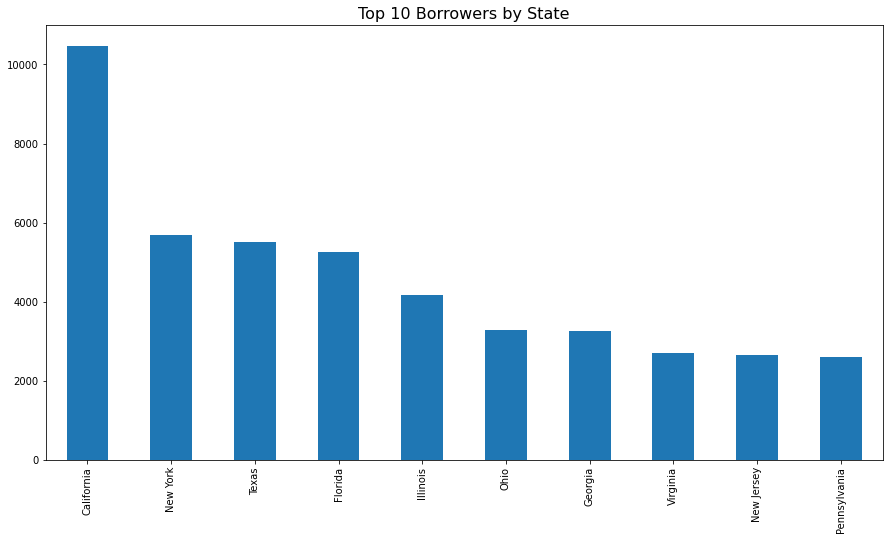

In [127]:
plt.figure(figsize = (15,8))
df_status['state_full'].value_counts().sort_values(ascending=False)[0:10].plot(kind ='bar')
plt.title('Top 10 Borrowers by State')

California, New York and Texas have the highest amount of borrowers.

In [128]:
df_status.to_csv('loan_data_cleaned.csv')

# **Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**

The Borrower state is a great variable of interest as the states could determine borrowing behaviours. The data was plotted on a map to show how borrowers are distributed by state. No transformations was needed as the state codes could easily be read to geo data.


# **Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

The Employment status was untidy and was cleaned to have the required classess for easy visualizations. The Occupation was also cleaned to avoid repetition in the data set.

# BIVARIATE EXPLORATION

This involves checking the patterns between two variables. A correlation heatmap wil be made

In [141]:
#check for a description of the features
df_status.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ListingKey,82695,82695,10273602499503308B223C1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatus,82695,4,Employed,79210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmploymentStatusDuration,82695.0,NaN,NaN,NaN,103.389842,96.215851,0.0,31.0,75.0,148.0,755.0
Occupation,82695,53,Other,21122,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProsperScore,82695.0,NaN,NaN,NaN,5.966866,2.373374,1.0,4.0,6.0,8.0,11.0
BorrowerRate,82695.0,NaN,NaN,NaN,0.196528,0.074919,0.04,0.1359,0.1897,0.2576,0.36
IncomeRange,82695,7,"$50,000-74,999",25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Term,82695.0,NaN,NaN,NaN,42.492001,11.66764,12.0,36.0,36.0,60.0,60.0
StatedMonthlyIncome,82695.0,NaN,NaN,NaN,5964.898239,8324.027224,0.0,3500.0,5000.0,7166.67,1750002.92
LoanOriginalAmount,82695.0,NaN,NaN,NaN,9080.956757,6292.000411,1000.0,4000.0,7500.0,13500.0,35000.0


In [142]:
#get numerical and categorical features
num_feat = ['LoanOriginalAmount', 'BorrowerRate', 'StatedMonthlyIncome','EmploymentStatusDuration']
cat_feat = ['Term', 'ProsperScore', 'EmploymentStatus','IncomeRange','LoanStatus']

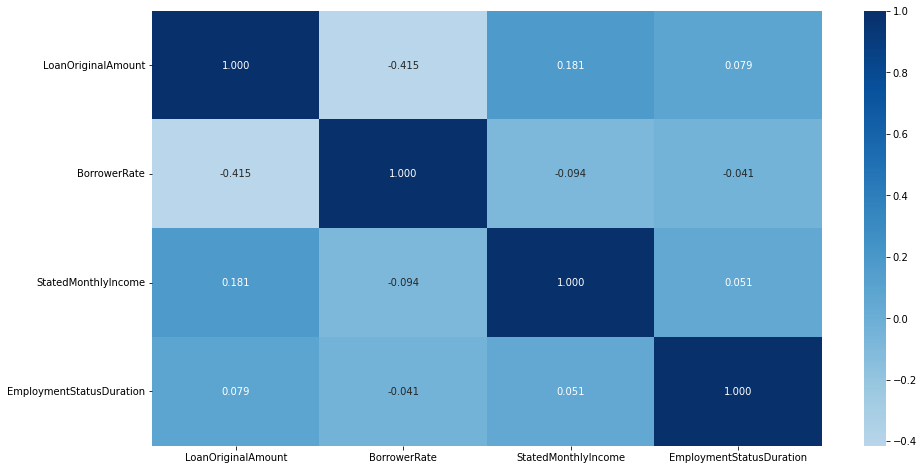

In [143]:
#create heatmap
plt.figure(figsize = [15, 8])
sb.heatmap(df_status[num_feat].corr(), annot = True, fmt = '.3f',
           cmap = 'Blues', center = 0);

In [144]:
#check the correlation
df_status.corr()

,EmploymentStatusDuration,ProsperScore,BorrowerRate,Term,StatedMonthlyIncome,LoanOriginalAmount
EmploymentStatusDuration,1.000000,-0.010065,-0.040602,0.053649,0.051210,0.079224
ProsperScore,-0.010065,1.000000,-0.652583,0.027063,0.081483,0.263849
BorrowerRate,-0.040602,-0.652583,1.000000,-0.001506,-0.094054,-0.414957
Term,0.053649,0.027063,-0.001506,1.000000,0.008528,0.341841
StatedMonthlyIncome,0.051210,0.081483,-0.094054,0.008528,1.000000,0.180686
LoanOriginalAmount,0.079224,0.263849,-0.414957,0.341841,0.180686,1.000000


# Prosper Score Vs Loan Status

How does Prosper Score Affect loans?

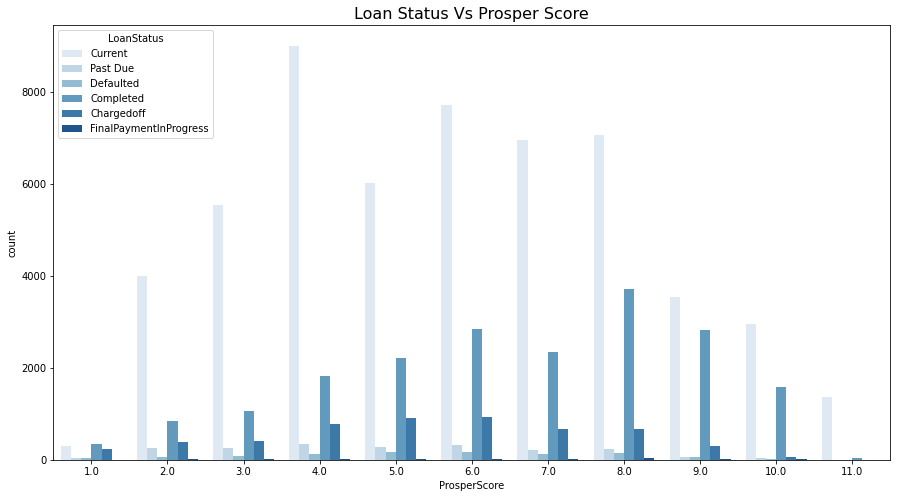

In [145]:
#plot the bar chachart
plt.figure(figsize = [15, 8]) 
sb.countplot(data = df_status, x = 'ProsperScore', hue = 'LoanStatus', palette = 'Blues');
plt.title('Loan Status Vs Prosper Score');
                      

The borrowers with current loans dominates across the prosper scores. The loans with final payment are relatively scarce

# Income Range Vs Term 

Does income affect duration of loans?

Text(0.5, 1.0, 'Income Range Vs Term ')

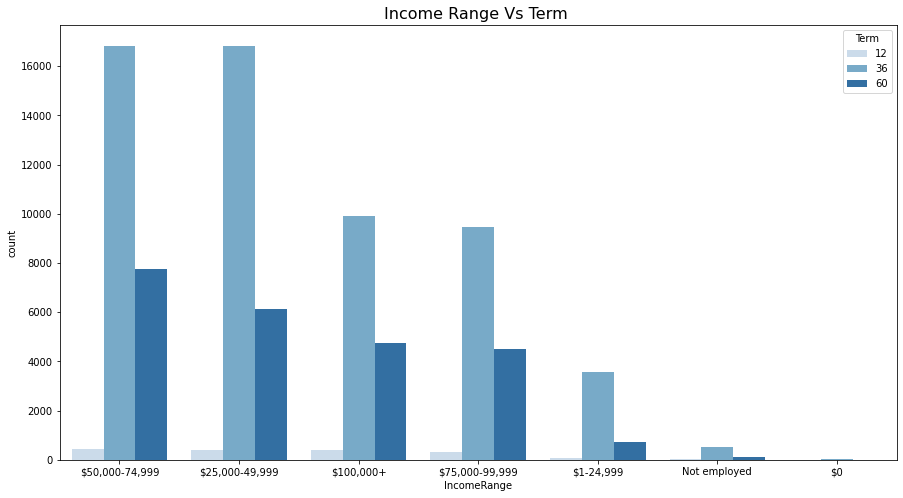

In [146]:
#plot the barplot
plt.figure(figsize = [15, 8]) 
sb.countplot(data = df_status, x = 'IncomeRange', hue = 'Term', palette = 'Blues');
plt.title('Income Range Vs Term ')
                      
                      

Most Borrowers prefer the 36 months loan term regardless of the income range.

# Employment Status Duration  Vs Loan Original Amount 

Does lenght of time at work affect the loans given?

Text(0.5, 1.0, 'Employment Status Duration Vs Loan Original Amount  ')

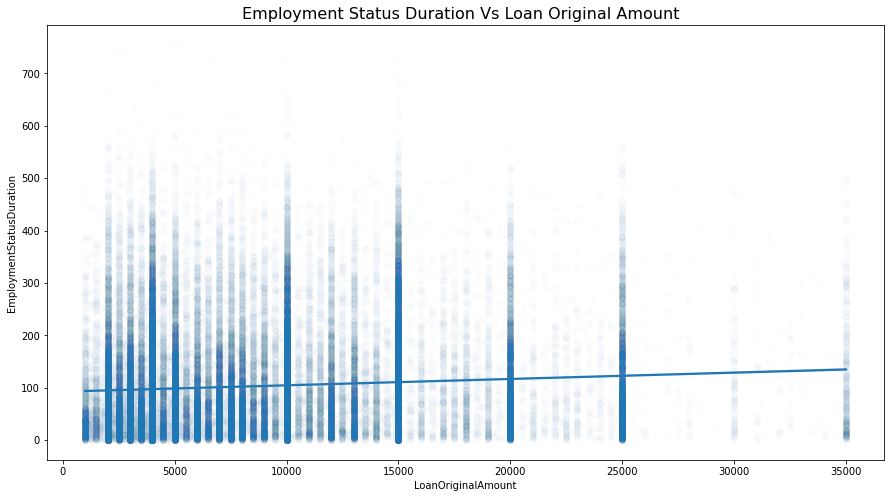

In [147]:
#plot the regplot
plt.figure(figsize = [15, 8])
sb.regplot(data = df_status, x = 'LoanOriginalAmount', y = 'EmploymentStatusDuration', scatter_kws={'alpha':0.01});
plt.title('Employment Status Duration Vs Loan Original Amount  ')

There seems to be a  very weak positive relationship between the Employment Duration and Loan Original Amount.  Maybe the time spent at work does not influence amount of loans.

# Employment Status Vs Loan Status 

Are unemployed people given loans?

Text(0.5, 1.0, 'Employment Status Vs Loan Status  ')

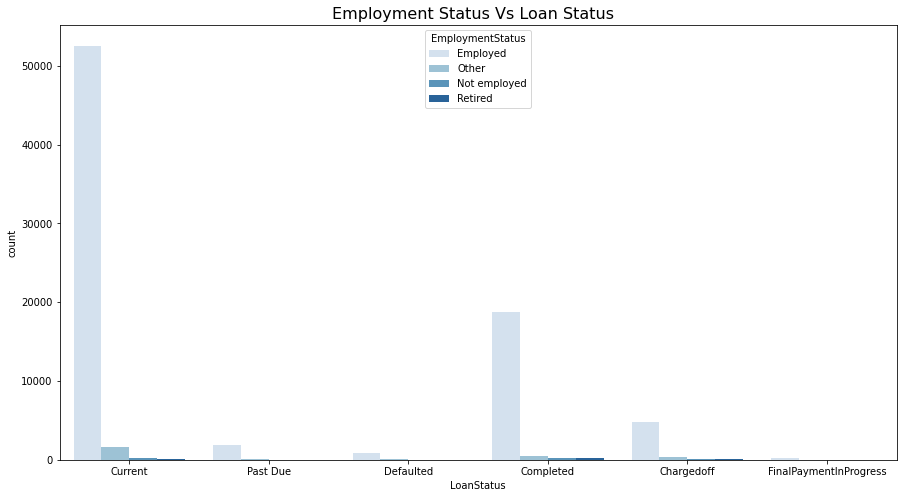

In [136]:
#plot the bar plot
plt.figure(figsize = [15, 8]) 
sb.countplot(data = df_status, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues');
plt.title('Employment Status Vs Loan Status  ')
                      
                      

Across most of the loans, Employed borrowers dominate the numbers. This is highly expected

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  There seems to be a  very weak positive relationship between the Employment Duration and Loan Original Amount.  Maybe the time spent at work does not influence amount of loans and most borrowers prefer the 36 months loan regardless of the Income range and current loans dominate the dataset

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There seem to be moderately negative relationship between the Borrower rate and Loan Original Amount. The higher the interest, the smaller the Loan. This can encourage better borrowing habits.

# MULTIVARIATE EXPLORATION

Loan status is the main point, so let's see how income range, employment status, prosper score and term affect the loan status

### How Term affects Loan status and Prosper score

Text(0.5, 1.0, 'Plot between Loan Status and Prosper Score ')

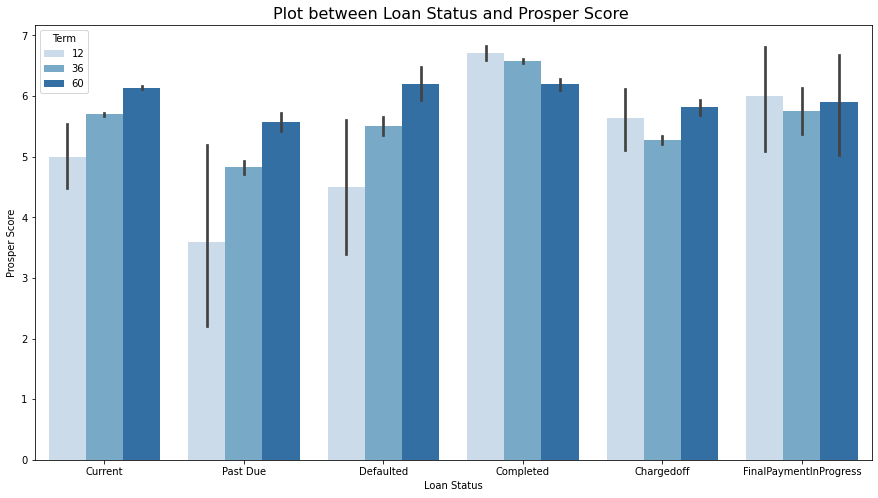

In [137]:
plt.figure(figsize = [15, 8])
sb.barplot(data = df_status, x='LoanStatus', y='ProsperScore', hue='Term', palette='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Prosper Score')
plt.title('Plot between Loan Status and Prosper Score ')

### How Term Affect Loan status and Loan amount

Text(0.5, 1.0, 'Plot between Loan Status and Loan Amount ')

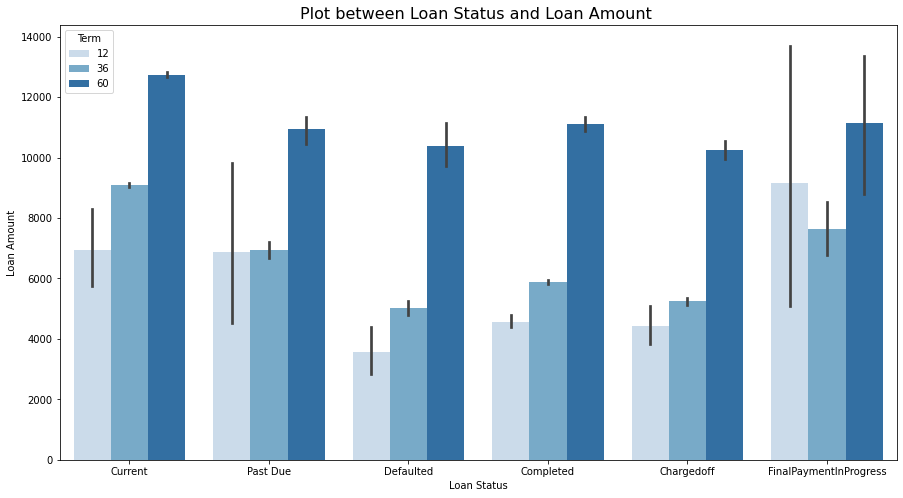

In [138]:
plt.figure(figsize = [15, 8])
sb.barplot(data = df_status, x='LoanStatus', y='LoanOriginalAmount', hue='Term', palette='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.title('Plot between Loan Status and Loan Amount ')

#### Observation

> Most loans with high loan amount are for a long term and  this trend is constant across the different loan statuses.

Text(0.5, 1.0, 'Plot between Loan Status and Monthly Income')

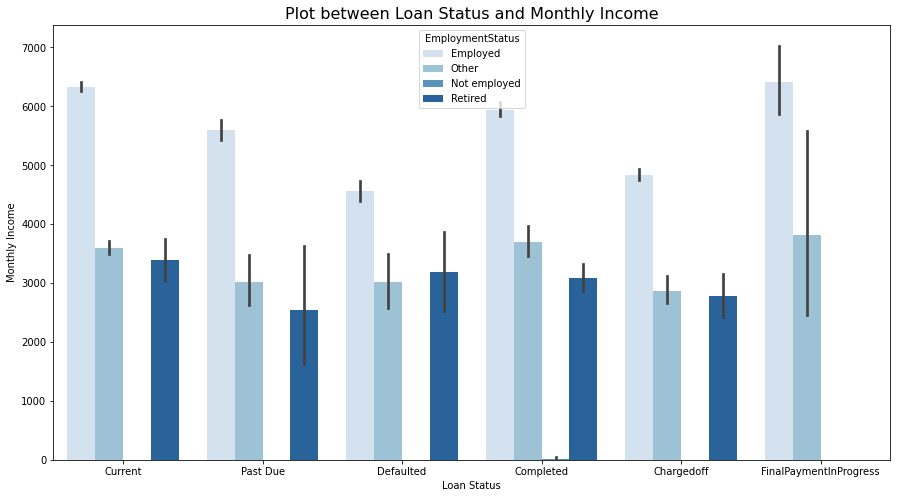

In [139]:
plt.figure(figsize = [15, 8])
sb.barplot(data = df_status, x='LoanStatus', y='StatedMonthlyIncome', hue='EmploymentStatus', palette='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Monthly Income')
plt.title('Plot between Loan Status and Monthly Income')

#### Observation

> Loaners who are about to pay off their loan with a short term have a high monthly income.

Text(0.5, 1.0, 'Plot between Loan Status and Loan Amount')

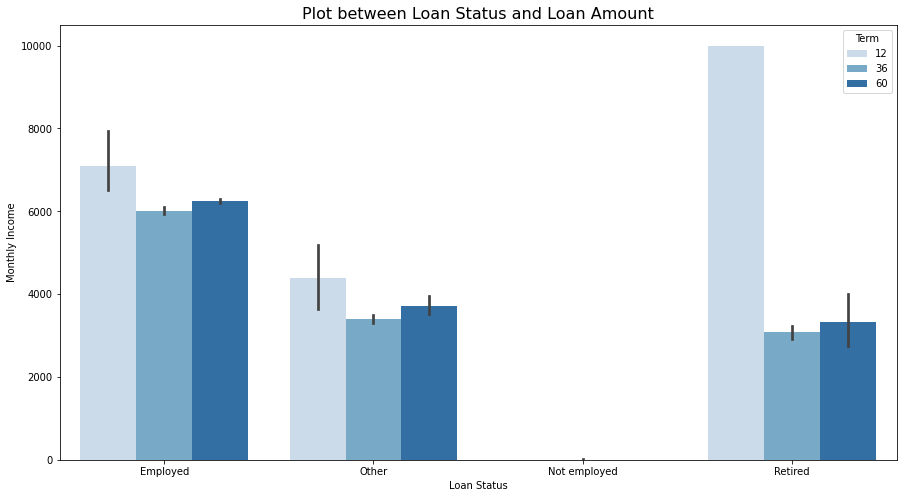

In [140]:
plt.figure(figsize = [15, 8])
sb.barplot(data = df_status, x='EmploymentStatus', y='StatedMonthlyIncome', hue='Term', palette='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Monthly Income')
plt.title('Plot between Loan Status and Loan Amount')

#### Observations

> There is no loaner with zero monthly income

> Most loaners had a short term loan

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The longer the loan the higher the prosper score and the length of loan.

### Were there any interesting or surprising interactions between features?

> The monthly income and Loan status. It was expected that a few unemployed people with hopes of gifts and donations should get loans. 

# CONCLUSION

# UNIVARIATE VISUALIZATION

1. Most of the loans are Current. Roughly 66% of all loans are current

2. Almost all the Borrowers are gainfully employed

3. Over 50% of the borrowers have less than 6 years work duration

4. Professionals, Salesmen ,Executives and programmers borrow more than the other professions. Judges and dentists have the lowest number of borrowers.

5. Few of the borrowes have 10.0 and above and few have below 3.0 Prosper score. This is expected as loans will not given to an unsuccessful individual and highly successful individuals might not need loans

6. The Borrower Rate seems to be normally distributed with a huge spike at 0.32. It seems that a lot of the loans have a rate of 0.32 

7. 30%  of the borrowers earn from 50,000 - 74,999 and only a few unemployed borrowers.

8. Most of the loans are 36 months in duration with just  few 12 months loan.

9. Most of the loans are used for Debt Consolidation and Health Improvement.

10. California, New York and Texas have the highest amount of borrowers.


# BIVARIATE VISUALIZATION

1. The borrowers with current loans dominates across the prosper scores. The loans with final payment are relatively scarce

2. Most Borrowers prefer the 36 months loan term regardless of the income range.

3. There seems to be a  very weak positive relationship between the Employment Duration and Loan Original Amount.  Maybe the time spent at work does not influence amount of loans.

4. Across most of the loans, Employed borrowers dominate the numbers. This is highly expected
 


# MULTIVARIATE VISUALIZATION

1. Most loans with high loan amount are for a long term and this trend is constant across the different loan statuses.
2. Loaners who are about to pay off their loan with a short term have a high monthly income.
3. There is no loaner with zero monthly income. Most loaners had a short term loan

# REFERENCES

1. https://github.com/yduan004/communicate-data-loan-data-from-Prosper/blob/master/exploration.ipynb
2. https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee
3. https://www.geeksforgeeks.org/choropleth-maps-using-plotly-in-python/
4. https://medium.com/geekculture/create-a-choropleth-map-of-state-unemployment-rates-with-plotly-1354050e0cfd
5. https://mode.com/blog/violin-plot-examples/#:~:text=What%20is%20a%20violin%20plot%3F,the%20density%20of%20each%20variable.